In [6]:
%cd ..

/home/kiritowu/code/brainhack-til-2023-lazythink/od


# Generate Charts for Error Analysis

In [5]:
!python mmdetection/tools/analysis_tools/coco_error_analysis.py \
    work_dirs/coco_detection/valid.bbox.json \
    work_dirs/rtmdet_l_8xb32-300e_coco/results/validation \
    --ann=data/labels-val.json

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.19s)
creating index...
index created!
-------------create ../work_dirs/rtmdet_l_8xb32-300e_coco/results/validation/bbox/-----------------
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.16s).
Accumulating evaluation results...
DONE (t=0.15s).
--------------analyzing 1-plushie---------------
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.83s).
Accumulating evaluation results...
DONE (t=0.10s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.82s).
Accumulating evaluation results...
DONE (t=0.11s).
--------------saving 1-plushie---------------


# DetVisGUI for Error Analysis

In [7]:
%%bash

git clone -b mmdetection https://github.com/kiritowu/DetVisGUI.git
cd DetVisGUI

Cloning into 'DetVisGUI'...


### Display the validation results of COCO detection:

In [31]:
!PYTHONPATH=./ python DetVisGUI/DetVisGUI.py configs/rtmdet/rtmdet_l_8xb32-300e_coco.py \
    --det_file work_dirs/coco_detection/valid.bbox.json \
    --stage val

# --det_file work_dirs/rtmdet_l_8xb32-300e_coco/results/validation/result.pkl

4013.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

==============[ COCO json info ]==============
Total Annotations: 1699
Total Image      : 800
Annotated Image  : 800
Total Category   : 1
----------------------------
       class        | count
----------------------------
      plushie       | 1699

/home/kiritowu/code/brainhack-til-2023-lazythink/od/DetVisGUI/DetVisGUI.py:1049: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  Image.ANTIALIAS)


### Display the test results of COCO detection(no groundtruth):

In [32]:
!PYTHONPATH=./ python DetVisGUI/DetVisGUI.py configs/rtmdet/rtmdet_l_8xb32-300e_coco.py \
    --det_file work_dirs/coco_detection/test.bbox.json \
    --stage test

4041.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

==============[ COCO json info ]==============
Total Annotations: 0
Total Image      : 1600
Annotated Image  : 0
Total Category   : 1
----------------------------
       class        | count
----------------------------

There are no annotations in image_0494.png.
There are no annotations in image_0494.png.
/home/kiritowu/code/brainhack-til-2023-lazythink/od/DetVisGUI/DetVisGUI.py:1049: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  Image.ANTIALIAS)
There are no annotations in image_1598.png.
There are no annotations in image_1598.png.
There are no annotations in image_1201.png.
There are no annotations in image_1201.png.
There are no annotations in image_0719.png.
There are no annotations in image_0719.png.
There are no annotations in image_0268.png.
There are no annotations in image_0268.png.
There are

# TIDE for Error Analysis

In [13]:
!pip install tidecv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 20.2 MB/s eta 0:00:00


In [1]:
%cd ..

/home/kiritowu/code/brainhack-til-2023-lazythink/od


-- valid.bbox --

bbox AP @ 50: 99.98

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00     0.01     0.00     0.01     0.00     0.00  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       0.02       0.00  



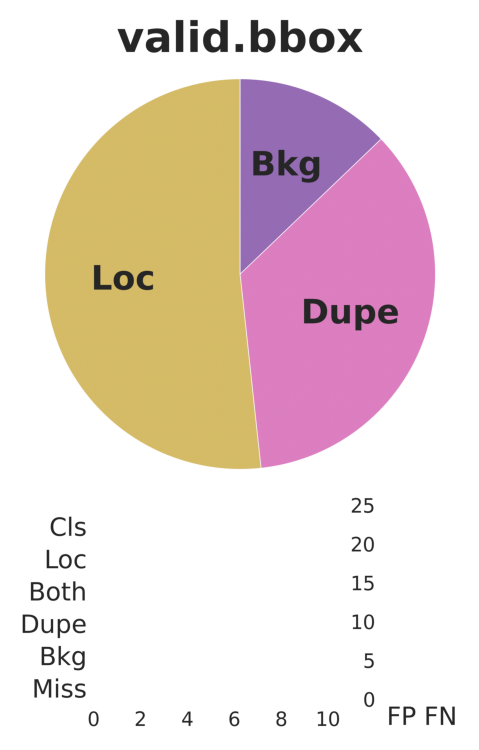

In [2]:
from tidecv import TIDE, datasets

tide = TIDE()
tide.evaluate(
    datasets.COCO("data/labels-val.json"),
    datasets.COCOResult("work_dirs/coco_detection/valid.bbox.json"),
    mode=TIDE.BOX,
)  # Use TIDE.MASK for masks
tide.summarize()  # Summarize the results as tables in the console
tide.plot()  # Show a summary figure. Specify a folder and it'll output a png to that folder.